In [43]:
import numpy as np
from itertools import combinations
import pandas as pd
import math
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as pltcolors

In [44]:
#Function to extract data from file
def getData(file_name):
    file_handle = open(file_name + ".txt", "r")
    lines = file_handle.readlines()
    gene_ids = []
    ground_truth_clusters = []
    input_matrix = []
    for line in lines:
        row = line.strip().split("\t")
        gene_ids.append(row.pop(0))
        ground_truth_clusters.append(int(row.pop(0)))
        att_list=[float(i) for i in row]
        input_matrix.append(att_list)
    return gene_ids, ground_truth_clusters, input_matrix

In [46]:
len(input_matrix[0])

16

In [45]:
file_name = "new_dataset_1"
gene_ids, ground_truth_clusters, input_matrix = getData(file_name)

In [47]:
centroids_ids = [3,20,9]
initial_centroids=[]
for i in centroids_ids:
    initial_centroids.append(input_matrix[i-1])
    
max_iterations = 100

In [48]:
# k_kmeans = 5
# initial_centroids=[]
# for i range(k):
#     initial_centroids.append(input_matrix[i])

In [49]:
#k-MEANS algorithm code
def kmeans(vectors, num_iterations, centroids):
    #print(centroids.shape)
    for z in range(num_iterations):
        cen_distances = []
        centdict = {}
        cluster_list=[]
        new_centroids = []
        for i in range(len(centroids)):
            centdict[i] = []
        for j in range(len(vectors)):
            distances = []
            for i in range(len(centroids)):
                dist = 0
                for k in range(len(vectors[j])):      
                    dist = dist + (centroids[i][k] - vectors[j][k])**2
                dist = math.sqrt(dist)
                distances.append(dist)        
            cent = distances.index(min(distances))
            values = centdict.get(cent)
            values.append(vectors[j])
            cluster_list.append(cent)
            centdict[cent]  = values
        print("Length",len(centdict.keys()))
        for l in centdict.keys():
            data = np.array(centdict.get(l))
            new_centroids.append((np.average(data, axis=0)).tolist())
        #new_centroids = np.array(new_centroids)
        print(new_centroids)
        if(new_centroids == centroids):
            print("Converging at iteration no.: ", z)
            centroids = new_centroids
            return np.array(centroids), cluster_list
        elif(z==num_iterations-1):
            print("Completed max iterations: ",z+1)
            centroids = new_centroids
            cluster_list=[]
            for j in range(len(vectors)):
                distances = []
                for i in range(len(centroids)):
                    dist = 0
                    for k in range(len(vectors[j])):      
                        dist = dist + (centroids[i][k] - vectors[j][k])**2
                    dist = math.sqrt(dist)
                    distances.append(dist)        
                cent = distances.index(min(distances))
                cluster_list.append(cent)
            return np.array(centroids), cluster_list
            #return np.array(new_centroids), cluster_list
        centroids = new_centroids

In [50]:
#k = len(centroids_ids)
final_centroids, cluster_list = kmeans(input_matrix, max_iterations, initial_centroids)

Length 3
[[-0.4235905172413794, -0.25077586206896546, 0.42879310344827615, 0.3250431034482759, 0.09090517241379309, -0.03784482758620695, -0.33590517241379286, -0.565521551724138, -0.4037931034482757, 0.5340086206896546, 0.5030301724137933, 0.3080603448275862, 0.10465948275862068, -0.11904310344827593, -0.26395258620689654, -0.16379310344827577], [-1.0300000000000002, -0.7275106382978723, -0.6531914893617022, -0.4176595744680851, -0.07106382978723404, 0.3708510638297872, 0.7465957446808511, 0.8695744680851065, 0.6468085106382978, -0.1293617021276596, -0.2738297872340426, -0.024893617021276595, 0.056957446808510656, 0.3324680851063829, 0.3198085106382979, 0.2017021276595745], [0.014186915887850489, -0.014728971962616818, -0.24697196261682242, -0.31592523364485986, -0.22269158878504688, -0.133588785046729, 0.07110280373831779, 0.2684018691588785, 0.3003551401869158, 0.014934579439252353, -0.08152336448598135, -0.1141214953271028, -0.08840186915887843, -0.0027943925233644665, 0.1674299065

In [19]:
#Function to generate incidence matrices
def getIncidentMatrix(clusters):
    incident_mat=[]
    for i in range(len(clusters)):
        row_values = []
        val=0
        for j in range(len(clusters)):
            if(clusters[i]==clusters[j]):
                val=1
            row_values.append(val)
            val=0
        incident_mat.append(row_values)
    return incident_mat

In [20]:
ground_truth_incident = getIncidentMatrix(ground_truth_clusters)
    
cluster_list_incident = getIncidentMatrix(cluster_list)

In [21]:
#Function to calculate Rand and Jaccard values
def randAndJaccard(incident_ground_truth, incident_cluster_list):
    m00=0
    m01=0
    m10=0
    m11=0
    for i in range(len(incident_cluster_list)):
        for j in range(len(incident_cluster_list)):
            if(incident_cluster_list[i][j]==incident_ground_truth[i][j]):
                if(incident_cluster_list[i][j]==1):
                    m11=m11+1
                else:
                    m00=m00+1
            else:
                if(incident_cluster_list[i][j]==1):
                    m10=m10+1
                else:
                    m01=m01+1            

    rand = (m11+m00)/(m00+m11+m01+m10)
    jaccard = m11/(m11+m10+m01)
    return rand, jaccard

In [22]:
randID, jaccardCoeff = randAndJaccard(ground_truth_incident, cluster_list_incident)
print("Jaccard Coefficient:\t", jaccardCoeff)
print("Rand Index:\t\t", randID)

Jaccard Coefficient:	 0.7009345794392523
Rand Index:		 0.8805333333333333


In [23]:
#Function to generate data for PCA visualization
def generatePCAData(centroids, vectors, num_clusters):
    universal_list = []
    for i in centroids:
        universal_list.append(i.tolist())
    for i in vectors:
        universal_list.append(i)
    pca_data1 = PCA(n_components=2).fit_transform(universal_list)
    pca_data = pca_data1[num_clusters:,:]
    centroid_data = pca_data1[0:num_clusters,:]
    
    return centroid_data, pca_data

In [34]:
#Function to plot the data
def plotData(file_name, data,clusters,centroids):
    allcolors=[]
    for i in pltcolors.cnames.items():
        allcolors.append(i[0])
    plt.figure(figsize=(12,9))
    legend = list()
    classes = list(set(clusters))
    allcolors1 = ['red','deepskyblue','green','purple', 'brown', 'plum', 'darkcyan','blue','magenta','lightslategray','black','yellow','mediumpurple','cyan',]
    if(len(classes)>len(allcolors)):
        colors = [random.choice(allcolors) for i in range(len(classes))]
    else:
        colors = allcolors1
    for i in range(len(classes)):
        cluster_data = data[np.where(np.array(clusters) == classes[i])]
        legend.append(plt.scatter(cluster_data[:,0],cluster_data[:,1], c=colors[i], s=50, alpha=0.9))
        plt.scatter(centroids[i][0],centroids[i][1], s=150, marker="x", c=colors[i], alpha = 0.9)
    plt.legend(legend,classes)
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")
    plt.title("PCA visualization for KMEANS and "+file_name+".txt file")
    plt.savefig("KMEANS_"+file_name+".png")
    plt.show()

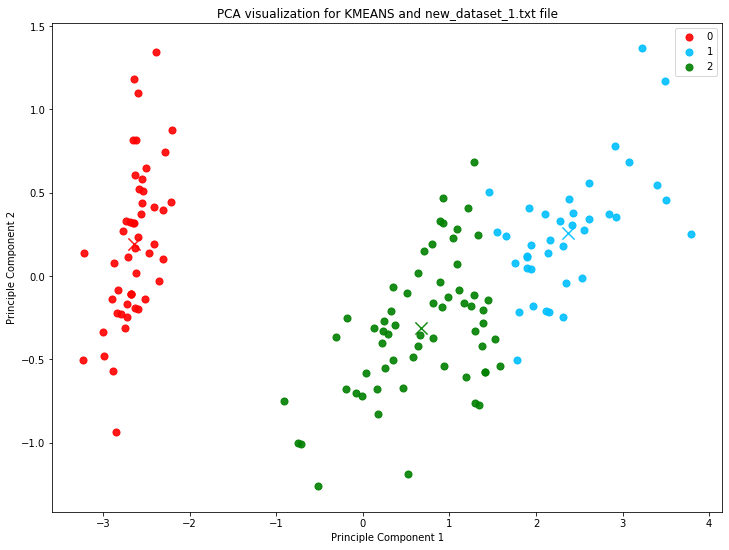

In [35]:
centroid_data, pca_data = generatePCAData(final_centroids, input_matrix, len(centroids_ids))
plotData(file_name, pca_data, cluster_list, centroid_data)

In [26]:
from sklearn.cluster import KMeans
k1 = KMeans(n_clusters = 3, init = np.array(initial_centroids), max_iter = 100).fit(input_matrix)

/home/hrishi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [27]:
len(cluster_list_incident)

150

In [28]:
np.array_equal(cluster_list,k1.labels_)

True

array([0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2,
       1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1], dtype=int32)

In [30]:
cluster_list

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1]

In [33]:
ground_truth_clusters

[1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 3,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 3,
 3,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 3]